# MBD28 – Machine Learning with Python

## Group Project: Task 1

### Quentin SIMONIN (e230060), Farah PANKHANIA (e210353)

### Step 1: Find a data set from https://archive.ics.uci.edu/ml/datasets.php to use for a classification problem.

Data Set chosen: Credit Approval: https://archive.ics.uci.edu/ml/datasets/Credit+Approval

In [ ]:
import pandas as pd
import numpy as np

df_credit_approval = pd.read_csv("/content/Credit approval.csv")
display(df_credit_approval)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


### Step 2: If the output variable is not binary (2 levels/classes), combine the different levels to create a response variable with only two levels.

This dataset's target variable has only two classes i.e, + and -

In [ ]:
#Summarize the dataset
df_credit_approval.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
A1,690,3,b,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2,690,350,?,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3,690.0,NaN,NaN,NaN,4.758725,4.978163,0.0,1.0,2.75,7.2075,28.0
A4,690,4,u,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A5,690,4,g,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A6,690,15,c,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A7,690,10,v,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A8,690.0,NaN,NaN,NaN,2.223406,3.346513,0.0,0.165,1.0,2.625,28.5
A9,690,2,t,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10,690,2,f,395,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 3: Perform data transformation if needed; for example, impute missing values, log transform variables with skewed distributions, merge categories of a categorical variable if needed.

<ipython-input-4-2eb45b46ba83>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_credit_approval.skew())


A2      1.079786
A3      1.481911
A8      2.916163
A11     5.048369
A14     2.734636
A15    13.370270
dtype: float64
Skewness distribution Plot: 
 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

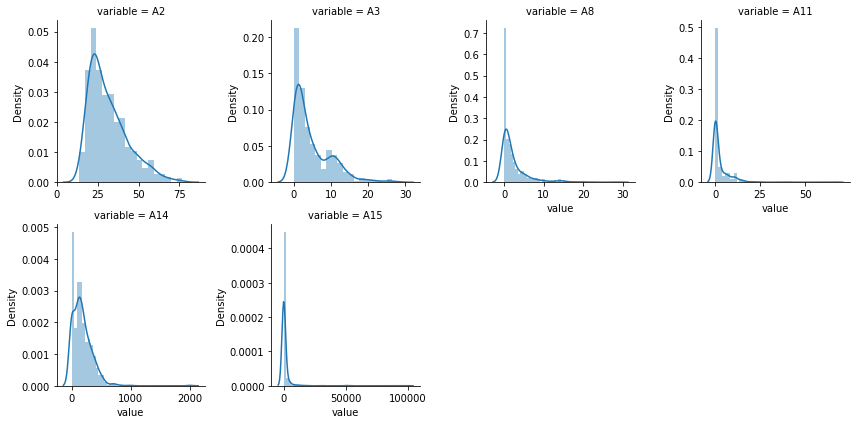

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Data Transformation

#1. Drop missing rows
df_credit_approval = df_credit_approval[~df_credit_approval.isin(['?']).any(axis=1)]

#2. Transform numeric variables
df_credit_approval = df_credit_approval.astype({'A2':'float','A14':'float'})

# Check the skewness and distribution of numerical variables
print(df_credit_approval.skew())

print('Skewness distribution Plot: \n ')
num_vars = [f for f in df_credit_approval.columns if df_credit_approval.dtypes[f] != 'object']
nd = pd.melt(df_credit_approval, value_vars = num_vars)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')

# Transforming right-skewed columns (A8,A11,A14 and A15) to logarithmic values
numerics = ['A8', 'A11', 'A14', 'A15']
for c in df_credit_approval.columns:
  if c in numerics:
      df_credit_approval[c] = np.log10(df_credit_approval[c]+1)

#3. Transform target variable into binary class
df_credit_approval['A16'] = df_credit_approval['A16'].replace('+', 1)
df_credit_approval['A16'] = df_credit_approval['A16'].replace('-', 0)

#4. Transform categorical class columns to lower number of labels
df_credit_approval['A1'] = df_credit_approval['A1'].replace('+', 1)
df_credit_approval['A1'] = df_credit_approval['A1'].replace('-', 0)

A4_levels = list(df_credit_approval['A4'].unique())
new_A4_levels = [0 if x in ['u', 'y'] else 1 for x in A4_levels]
mapping = dict(zip(A4_levels, new_A4_levels))
df_credit_approval['A4'] = df_credit_approval['A4'].map(mapping)
A6_levels = list(df_credit_approval['A6'].unique())
new_A6_levels = [0 if x in ['c', 'w', 'aa', 'k', 'm'] else 1 for x in A6_levels]
mapping = dict(zip(A6_levels, new_A6_levels))
df_credit_approval['A6'] = df_credit_approval['A6'].map(mapping)
A7_levels = list(df_credit_approval['A7'].unique())
new_A7_levels = [0 if x in ['v'] else 1 for x in A7_levels]
mapping = dict(zip(A7_levels, new_A7_levels))
df_credit_approval['A7'] = df_credit_approval['A7'].map(mapping)

# Performing one hot encoding on columns A5 and A13
categorical_cols = ['A5', 'A13']
df_credit_approval = pd.get_dummies(df_credit_approval, columns=categorical_cols)

# Perform binary encoding on columns with only two level of categorical values
df_credit_approval['A1'] = df_credit_approval['A1'].replace('b', 1)
df_credit_approval['A1'] = df_credit_approval['A1'].replace('a', 0)

df_credit_approval['A9'] = df_credit_approval['A9'].replace('t', 1)
df_credit_approval['A9'] = df_credit_approval['A9'].replace('f', 0)

df_credit_approval['A10'] = df_credit_approval['A10'].replace('t', 1)
df_credit_approval['A10'] = df_credit_approval['A10'].replace('f', 0)

df_credit_approval['A12'] = df_credit_approval['A12'].replace('t', 1)
df_credit_approval['A12'] = df_credit_approval['A12'].replace('f', 0)

# Rearrannge columns in the df
df_credit_approval = df_credit_approval[['A1', 'A2', 'A3', 'A4', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
       'A14', 'A15', 'A5_g', 'A5_gg', 'A5_p', 'A13_g', 'A13_p',
       'A13_s', 'A16']]


Printing the dataset after Data Transformation

In [ ]:
print("Data set after Data Transformation:")
display(df_credit_approval)

Data set after Data Transformation:


,A1,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A14,A15,A5_g,A5_gg,A5_p,A13_g,A13_p,A13_s,A16
0,1,30.83,0.000,0,0,0,0.352183,1,1,0.301030,0,2.307496,0.000000,1,0,0,1,0,0,1
1,0,58.67,4.460,0,1,1,0.606381,1,1,0.845098,0,1.643453,2.748963,1,0,0,1,0,0,1
2,0,24.50,0.500,0,1,1,0.397940,1,0,0.000000,0,2.448706,2.916454,1,0,0,1,0,0,1
3,1,27.83,1.540,0,0,0,0.676694,1,1,0.778151,1,2.004321,0.602060,1,0,0,1,0,0,1
4,1,20.17,5.625,0,0,0,0.432969,1,0,0.000000,0,2.082785,0.000000,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,1,1,0.352183,0,0,0.000000,0,2.416641,0.000000,0,0,1,1,0,0,0
686,0,22.67,0.750,0,0,0,0.477121,0,1,0.477121,1,2.303196,2.596597,1,0,0,1,0,0,0
687,0,25.25,13.500,0,1,1,0.477121,0,1,0.301030,1,2.303196,0.301030,0,0,1,1,0,0,0
688,1,17.92,0.205,0,0,0,0.017033,0,0,0.000000,0,2.448706,2.875640,1,0,0,1,0,0,0


### Step 4: • Assume a specific business setting. Come up with an imaginary scenario in which you need to build a predictive model. Explain who’s perspective you are taking and how the predictions are going to be used.

In this setting, bank employees need to make decisions about acceptance or refusal of credit application. Thus, they want to build a predictive model which will use different types of data (age, socio-professional category, loan grade, income, purpose, …) to determine if they should either accept or reject the credit application.



### Step 5: • Describe the meaning and significance of the two types of prediction errors that your classifier can make. • What are the consequences of making each type of error? • Specify a FP-FN cost ratio and provide justifications for choosing this specific value.

With this type of model, two types of errors are possible: Type 1 and type 2. 
A type 1 error is also called a false positive error. In this situation, the classifier predicted that a value is positive when in reality, the value is negative. In our context, that means that the classifier decided to accept the credit application but it should have refused it. 
With a type 2 error or false negative, the classifier is predicting that the value is negative whereas the value is actually positive. In our context, that means that the classifier decided to reject the credit application but it should have accepted it. 
In our context, the consequences of a type 1 and a type 2 error are not equal. Indeed, accepting a credit application that should have been rejected could lead to a default from the applicant. In this case, as a bank, we could lose a lot of money but also part of our credibility which can impact our image. With a type 2 error, we could probably lose a client who will try to find a bank that will accept his application but it seems to be less impactful financially speaking than a type 1 error. Therefore, our objective will be to have a model with a high accuracy but also with a low FP/FN ratio. Based on the literature review we made, it seems that a 1/10 FP/FN cost ratio is a ratio close to reality and that demonstrates the difference of impact between a false positive and a false negative. For example, in a research paper written by Microsoft and EY employees (https://www.microsoft.com/en-us/research/publication/assessing-and-mitigating-unfairness-in-credit-models-with-the-fairlearn-toolkit/), the researchers based their assumptions and their model on 1/11.5 ratio. To be closer to the real costs that could face a bank, we will assume that the cost of a type 1 error is €100 and the cost of a type 2 error is €1,000

Cost ratio: 100*FN + 1000*FP (multiplier)


### Step 6: Write a function that has two input arguments, (1) a vector of the true values of the output variable and (2) a vector of predicted values of the output variable, and returns a single number specifying the cost associated with the prediction.

In [ ]:
def calculate_cost(y_actual, y_pred):
# Function for calculating the cost of prediction.
# Inputs: 2
# y_actual (int vec) 0 and 1 values of actual output variable.
# y_pred (int vec) 0 and 1 values of predicted output variable.
# Output: # (float) the prediction cost
  FN = sum(y_pred[(y_actual == 1)] == 0) # calculate using Y_actual and Y_pred
  FP = sum(y_pred[(y_actual == 0)] == 1) # calculate using Y_actual and Y_pred
  cost = (100*FN)+(1000*FP) # calculate using FP and FN
  return cost

### Step 7: To generate 100 random threshold values between 0 and 1 (up to 3 decimal places)


In [ ]:
# Only threshold higher than 0.5 because we don't want to predict too many positive
import numpy as np
threshold_values = np.around(np.linspace(0.5,1,100),3)

print(threshold_values)

[0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535 0.54  0.545 0.551 0.556
 0.561 0.566 0.571 0.576 0.581 0.586 0.591 0.596 0.601 0.606 0.611 0.616
 0.621 0.626 0.631 0.636 0.641 0.646 0.652 0.657 0.662 0.667 0.672 0.677
 0.682 0.687 0.692 0.697 0.702 0.707 0.712 0.717 0.722 0.727 0.732 0.737
 0.742 0.747 0.753 0.758 0.763 0.768 0.773 0.778 0.783 0.788 0.793 0.798
 0.803 0.808 0.813 0.818 0.823 0.828 0.833 0.838 0.843 0.848 0.854 0.859
 0.864 0.869 0.874 0.879 0.884 0.889 0.894 0.899 0.904 0.909 0.914 0.919
 0.924 0.929 0.934 0.939 0.944 0.949 0.955 0.96  0.965 0.97  0.975 0.98
 0.985 0.99  0.995 1.   ]


### Step 8: Create a matrix of size 100 (rows) by 10 (columns), with cells initialized with 0 values. Name this matrix out.


In [ ]:
#create 2D numpy array with zeros
out = np.zeros((100, 10))

### Step 9: Create a vector that randomly assigns each data point to one of the 10 CV folds. Name the vector fold_vec.

In [ ]:
y = df_credit_approval["A16"]
y = y.astype(int)
n = np.ceil(len(y) / 10)
fold_vec = np.concatenate([np.arange(0, 10)] * int(n))
fold_vec = fold_vec[0:len(y)]
np.random.seed(1)
fold_vec = np.random.permutation(fold_vec)

### Step 10: With a specific classification model in mind (e.g., logistic regression), perform 10-fold CV to calculate the out-of-sample performance of the candidate thresholds, where performance is measured in terms of the prediction cost. Save the calculated cost for the jth threshold during the ith run of the CV in Row j, Column i of out.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

for i in range(10):
  test_i = fold_vec == i
  train_i = fold_vec != i 
  x_test = df_credit_approval.iloc[test_i, :19]
  x_train = df_credit_approval.iloc[train_i, :19]
  y_test = y[test_i]
  y_train = y[train_i]
  mod = LogisticRegression(solver='lbfgs', max_iter=1000) # instantiate a classifier
  mod.fit(x_train, y_train) # train the classifier using the training set
  prob = mod.predict_proba(x_test) # get probabilities for the data in the validation set
  prob = prob[:, 1] # retrieve the probabilities for Y=1
  for j in range(100):
    pred = prob >= threshold_values[j] # use jth threshold to turn prob.s into predictions
    pred = pred.astype(int)
    cost = calculate_cost(y_test, pred) # calculate the prediction cost, using pred
    out[j][i] = cost # save cost in Row j, Column i of out

### Step 11: What is the best threshold and what is its associated cost?
For each threshold value, you need to first calculate its average cost across all 10 CV folds, and then select the threshold value with the best average performance.

In [ ]:
avg_cost_for_each_threshold_array = out.mean(axis=1)
minimum = np.min(avg_cost_for_each_threshold_array)
min_cost_index = np.where(avg_cost_for_each_threshold_array == minimum)
print("Minimum cost value(s):")
print(min_cost_index)

print("Best threshold value(s):")
for i in range(len(min_cost_index[0])):
  print(threshold_values[min_cost_index[0][i]])


Minimum cost value(s):
(array([80]),)
Best threshold value(s):
0.904


In [ ]:
avg_cost_for_each_threshold_array[80]

2090.0

#### The threshold value with the best average performance and lowest cost is at 0.904 for our model with an associated cost of €2,090

### Step 12: If the best threshold is at the boundary of the values defined in Step 7 (the smallest or largest threshold), then redefine the 100 candidate thresholds and redo Steps 8 to 11.

Since our threshold value is significantly decent, we do not perform step 12.